Tom Kim's first deep learning personal project

Goal of this project: To build a convolutional neural network model that would detect malaria infected cells with a high accuracy. Save the world!

About the original dataset:
- Name: Malaria Cell Images Dataset
- One folder of images of malaria infected cells & the other of images of uninfected cells (a total of 27,558 images)
- Acknowledgement -- this dataset is taken from the official NIH website (https://ceb.nlm.nih.gov/repositories/malaria-datasets/)

Table of Contents:

1) Divide the data into three parts: trainset, validationset, and testset.
    - only going to use a total of 8k images out of 27,558
    - a total of 4k images for trainset (2k of infected & 2k of uninfected)
    - a total of 2k images for validationset (1k of infected & 1k of uninfected)
    - a total of 1k images for testset (1k of infected & 1k of uninfected)

2) Build a CNN model:
    - well-balanced binary classification problem
    - activation function: relu & sigmoid
    - loss function: binary crossentropy
    - use accuray (b/c the dataset is balanced between images of infected and of uninfected cells
    - Objective : To build an overfitted model first and then add dropouts, weight regularization etc afterwards
    - model saved as: 'malaria_detector_overfitted' (test acc: 0.939499990940094)

3) Data Preprocessing:
    - Read each png file, decode into RGB file, and convert it into a tensor
    - Scale the tensor to be [0,1] (as neural network prefers small input values)

4) Reduce overfitting and tweak hyper-parameters
    - Weight Regularization
    - Batch Normalization
    - Reduce number of layers and parameters
    - model saved as: 'malaria_detector_regularized' (test acc: 0.9264999920129776)
    - Data augmentation
    - model saved as: 'malaria_detector_data_augmented.h5' (test acc: 0.9519999927282333)

5) Use SeparableConv2D to substitute Conv2D
    - Use depthwise separable convolution (Separable Conv2D)
    - Separable Conv2D is lighter (less model parameters to train) and faster
    - model saved as: 'malaria_detector_separableConv2D' (test acc: 0.8694999974966049)
    -> compared to other models, time for each epoch is shorter but accuracy and loss improved relatively slowly

6) Use pre-trained network to compare with the model trained above.
    - only reuse the portion of CNN layers (b/c the rest is specificly trained to a different problem)
    - Reference from : Deep Learning with Python written by Francois Chollet
    - model saved as: 'malaria_detector_VGG16'
    
7) Conclusion

Part 1. < Divide the data into three parts: trainset, validationset, and testset >
    - only going to use a total of 8k images out of 27,558
    - a total of 4k images for trainset (2k of infected & 2k of uninfected)
    - a total of 2k images for validationset (1k of infected & 1k of uninfected)
    - a total of 1k images for testset (1k of infected & 1k of uninfected)

In [3]:
# Make necessary folders for the data
import os
import shutil

data_dir = './all_cells'
os.mkdir(data_dir)
train_dir = os.path.join(data_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(data_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(data_dir, 'test')
os.mkdir(test_dir)

train_infected_cells_dir = os.path.join(train_dir, 'infected')
os.mkdir(train_infected_cells_dir)
train_uninfected_cells_dir = os.path.join(train_dir, 'uninfected')
os.mkdir(train_uninfected_cells_dir)

validation_infected_cells_dir = os.path.join(validation_dir, 'infected')
os.mkdir(validation_infected_cells_dir)
validation_uninfected_cells_dir = os.path.join(validation_dir, 'uninfected')
os.mkdir(validation_uninfected_cells_dir)

test_infected_cells_dir = os.path.join(test_dir, 'infected')
os.mkdir(test_infected_cells_dir)
test_uninfected_cells_dir = os.path.join(test_dir, 'uninfected')
os.mkdir(test_uninfected_cells_dir)

In [ ]:
# Shuffle images before dividing
import os
import random
randlist = random.sample(range(1, 13780), 13779)

count = 1
for i in randlist:
    os.rename('./cell_images/Parasitized/parasitized' + str(count) + '.png',
              './cell_images/Parasitized/' + str(i) + '.png')
    os.rename('./cell_images/Uninfected/uninfected' + str(count) + '.png',
              './cell_images/Uninfected/' + str(i) + '.png')
    count += 1

In [4]:
# Randomly select uninfected images
base_dir = './cell_images'

count = 0
hasSeen = set()

while count < 2000:
    x = random.randint(1, 13779)
    if x not in hasSeen :
        hasSeen.add(x)
        fname = str(x) + '.png'
        src = os.path.join(base_dir, 'Uninfected')
        src = os.path.join(src, fname)
        dst = os.path.join(train_uninfected_cells_dir, fname)
        shutil.copyfile(src, dst)
        count += 1

while count < 3000:
    x = random.randint(1, 13779)
    if x not in hasSeen :
        hasSeen.add(x)
        fname = str(x) + '.png'
        src = os.path.join(base_dir, 'Uninfected')
        src = os.path.join(src, fname)
        dst = os.path.join(validation_uninfected_cells_dir, fname)
        shutil.copyfile(src, dst)
        count += 1

while count < 4000:
    x = random.randint(1, 13779)
    if x not in hasSeen:
        hasSeen.add(x)
        fname = str(x) + '.png'
        src = os.path.join(base_dir, 'Uninfected')
        src = os.path.join(src, fname)
        dst = os.path.join(test_uninfected_cells_dir, fname)
        shutil.copyfile(src, dst)
        count += 1

In [5]:
# Randomly select infected images
count = 0
hasSeen = set()

while count < 2000:
    x = random.randint(1, 13779)
    if x not in hasSeen :
        hasSeen.add(x)
        fname = str(x) + '.png'
        src = os.path.join(base_dir, 'Parasitized')
        src = os.path.join(src, fname)
        dst = os.path.join(train_infected_cells_dir, fname)
        shutil.copyfile(src, dst)
        count += 1

while count < 3000:
    x = random.randint(1, 13779)
    if x not in hasSeen :
        hasSeen.add(x)
        fname = str(x) + '.png'
        src = os.path.join(base_dir, 'Parasitized')
        src = os.path.join(src, fname)
        dst = os.path.join(validation_infected_cells_dir, fname)
        shutil.copyfile(src, dst)
        count += 1

while count < 4000:
    x = random.randint(1, 13779)
    if x not in hasSeen:
        hasSeen.add(x)
        fname = str(x) + '.png'
        src = os.path.join(base_dir, 'Parasitized')
        src = os.path.join(src, fname)
        dst = os.path.join(test_infected_cells_dir, fname)
        shutil.copyfile(src, dst)
        count += 1

In [6]:
print('Trainset of uninfected cells : ', len(os.listdir(train_uninfected_cells_dir)))
print('Trainset of infected cells : ', len(os.listdir(train_infected_cells_dir)))
print('Validationset of uninfected cells : ', len(os.listdir(validation_uninfected_cells_dir)))
print('Validationset of infected cells : ', len(os.listdir(validation_infected_cells_dir)))
print('Testset of uninfected cells : ', len(os.listdir(test_uninfected_cells_dir)))
print('Testset of infected cells : ', len(os.listdir(test_infected_cells_dir)))

('Trainset of uninfected cells : ', 2000)
('Trainset of infected cells : ', 2000)
('Validationset of uninfected cells : ', 1000)
('Validationset of infected cells : ', 1000)
('Testset of uninfected cells : ', 1000)
('Testset of infected cells : ', 1000)


Part2. < Build a CNN model >
    - binary classification problem
    - activation function: relu & sigmoid
    - loss function: binary crossentropy
    - use accuray (b/c the dataset is balanced between images of infected and of uninfected cells
    - Objective : To build an overfitted model first and then add dropouts, weight regularization etc afterwards

In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [14]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Part3. < Data Preprocessing >
    - Read each png file
    - Decode into RGB file
    - Convert to float type tensor
    - Scale the tensor to be [0,1] (as neural network prefers small input values)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# Scale every image by 1/255
train_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_data_generator.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [16]:
for data_batch, label_batch in train_generator:
    print('size of data_batch : ', data_batch.shape)
    print('size of label_batch : ', label_batch.shape)
    break

('size of data_batch : ', (20, 150, 150, 3))
('size of label_batch : ', (20,))


In [17]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=100)

Epoch 1/20
200/200 [==============================] - 192s 960ms/step - loss: 0.6720 - acc: 0.5860 - val_loss: 0.6056 - val_acc: 0.6700
Epoch 2/20
200/200 [==============================] - 207s 1s/step - loss: 0.5956 - acc: 0.6872 - val_loss: 0.6093 - val_acc: 0.6515
Epoch 3/20
200/200 [==============================] - 194s 969ms/step - loss: 0.5013 - acc: 0.7603 - val_loss: 0.4418 - val_acc: 0.8045
Epoch 4/20
200/200 [==============================] - 203s 1s/step - loss: 0.3527 - acc: 0.8500 - val_loss: 0.2675 - val_acc: 0.8995
Epoch 5/20
200/200 [==============================] - 198s 989ms/step - loss: 0.2257 - acc: 0.9135 - val_loss: 0.1925 - val_acc: 0.9305
Epoch 6/20
200/200 [==============================] - 199s 995ms/step - loss: 0.1733 - acc: 0.9367 - val_loss: 0.1852 - val_acc: 0.9370
Epoch 7/20
200/200 [==============================] - 181s 904ms/step - loss: 0.1539 - acc: 0.9467 - val_loss: 0.1697 - val_acc: 0.9480
Epoch 8/20
200/200 [==============================] - 

In [18]:
model.save('malaria_detector_overfitted')

In [10]:
model = models.load_model('malaria_detector_overfitted')

test_data_generator = ImageDataGenerator(rescale=1./255)

test_generator = test_data_generator.flow_from_directory(test_dir,
                                                         target_size=(150,150),
                                                         batch_size=20,
                                                         class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=100)

Found 2000 images belonging to 2 classes.


In [11]:
print('test acc: ' + str(test_acc))

test acc: 0.939499990940094


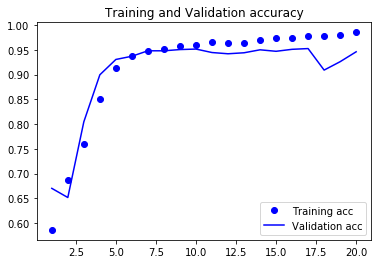

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

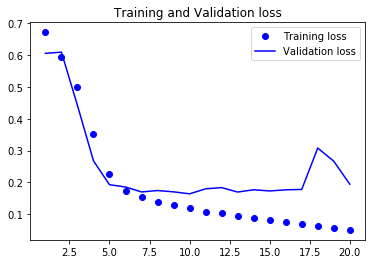

In [21]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Part4. < Reduce overfitting and tweak hyper-parameters >
    - Weight Regularization
    - Batch Normalization
    - Reduce number of layers and parameters
    - Data augmentation

In [57]:
#Weight Regularization & BatchNormalization layer Added
from keras.regularizers import l2

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', kernel_regularizer=l2(0.001), input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [59]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [26]:
# Scale every image by 1/255
train_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_data_generator.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [27]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=30, # Increased epochs from 20 to 30
    validation_data=validation_generator,
    validation_steps=100)

Epoch 1/30
200/200 [==============================] - 199s 993ms/step - loss: 0.8636 - acc: 0.6752 - val_loss: 0.7477 - val_acc: 0.7480
Epoch 2/30
200/200 [==============================] - 198s 989ms/step - loss: 0.6334 - acc: 0.8215 - val_loss: 0.9004 - val_acc: 0.6060
Epoch 3/30
200/200 [==============================] - 187s 935ms/step - loss: 0.4516 - acc: 0.9057 - val_loss: 0.4288 - val_acc: 0.9205
Epoch 4/30
200/200 [==============================] - 187s 936ms/step - loss: 0.3632 - acc: 0.9430 - val_loss: 0.4335 - val_acc: 0.9045
Epoch 5/30
200/200 [==============================] - 200s 998ms/step - loss: 0.3102 - acc: 0.9540 - val_loss: 0.5423 - val_acc: 0.8755
Epoch 6/30
200/200 [==============================] - 208s 1s/step - loss: 0.2759 - acc: 0.9697 - val_loss: 0.4444 - val_acc: 0.9130
Epoch 7/30
200/200 [==============================] - 208s 1s/step - loss: 0.2457 - acc: 0.9740 - val_loss: 0.3820 - val_acc: 0.9355
Epoch 8/30
200/200 [==============================] - 

In [28]:
model.save('malaria_detector_regularized')

In [13]:
model = models.load_model('malaria_detector_regularized')

test_data_generator = ImageDataGenerator(rescale=1./255)

test_generator = test_data_generator.flow_from_directory(test_dir,
                                                         target_size=(150,150),
                                                         batch_size=20,
                                                         class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=100)

Found 2000 images belonging to 2 classes.


In [14]:
print('test acc: ' + str(test_acc))

test acc: 0.9264999920129776


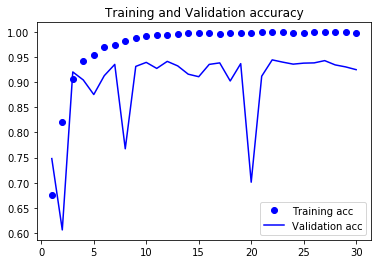

In [29]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

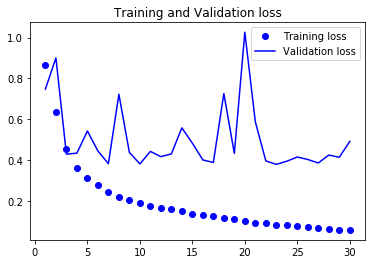

In [30]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [60]:
# Data Augmentation added
# Scale every image by 1/255
train_data_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,)

# Generator for validation-set and test-set should not be augmented
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_data_generator.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [61]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=100)

Epoch 1/50
200/200 [==============================] - 197s 983ms/step - loss: 0.8953 - acc: 0.6380 - val_loss: 1.1659 - val_acc: 0.5995
Epoch 2/50
200/200 [==============================] - 215s 1s/step - loss: 0.7062 - acc: 0.7635 - val_loss: 1.0016 - val_acc: 0.7210
Epoch 3/50
200/200 [==============================] - 228s 1s/step - loss: 0.5314 - acc: 0.8615 - val_loss: 0.4046 - val_acc: 0.9200
Epoch 4/50
200/200 [==============================] - 249s 1s/step - loss: 0.4718 - acc: 0.8867 - val_loss: 0.3695 - val_acc: 0.9405
Epoch 5/50
200/200 [==============================] - 224s 1s/step - loss: 0.4375 - acc: 0.8955 - val_loss: 0.3361 - val_acc: 0.9480
Epoch 6/50
200/200 [==============================] - 234s 1s/step - loss: 0.4164 - acc: 0.9045 - val_loss: 0.3093 - val_acc: 0.9515
Epoch 7/50
200/200 [==============================] - 250s 1s/step - loss: 0.3832 - acc: 0.9102 - val_loss: 0.3105 - val_acc: 0.9475
Epoch 8/50
200/200 [==============================] - 236s 1s/step

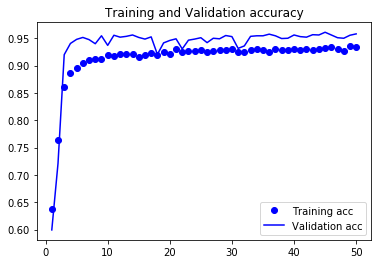

In [62]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

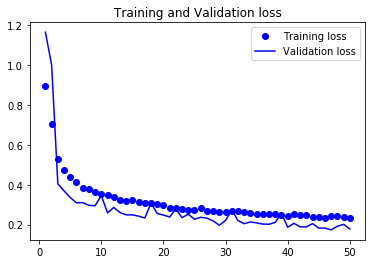

In [63]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [64]:
model.save('malaria_detector_data_augmented.h5')

In [5]:
model = models.load_model('malaria_detector_data_augmented.h5')

test_data_generator = ImageDataGenerator(rescale=1./255)

test_generator = test_data_generator.flow_from_directory(test_dir,
                                                         target_size=(150,150),
                                                         batch_size=20,
                                                         class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=100)

Found 2000 images belonging to 2 classes.


In [9]:
print('test acc: ' + str(test_acc))

test acc: 0.9519999927282333


Part5. < Use SeparableConv2D to substitute Conv2D >
    - Use depthwise separable convolution (Separable Conv2D)
    - Separable Conv2D is lighter (less model parameters to train) and faster

In [117]:
model = models.Sequential()
model.add(layers.SeparableConv2D(32, (3, 3),
                                 activation='relu',
                                 kernel_regularizer=l2(0.001),
                                 input_shape=(150, 150, 3, )))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SeparableConv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SeparableConv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SeparableConv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [118]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_126 (Separa (None, 148, 148, 32)      155       
_________________________________________________________________
max_pooling2d_109 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
separable_conv2d_127 (Separa (None, 72, 72, 64)        2400      
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
separable_conv2d_128 (Separa (None, 34, 34, 128)       8896      
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
separable_conv2d_129 (Separa (None, 15, 15, 128)       17664     
__________

In [119]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5), #learning rate lowered from 1e-4
              metrics=['acc'])

In [120]:
# Scale every image by 1/255
train_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_data_generator.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [121]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=30, # Increased epochs from 20 to 30
    validation_data=validation_generator,
    validation_steps=100)

Epoch 1/30
200/200 [==============================] - 131s 656ms/step - loss: 0.6901 - acc: 0.6120 - val_loss: 0.6856 - val_acc: 0.6530
Epoch 2/30
200/200 [==============================] - 122s 612ms/step - loss: 0.6795 - acc: 0.6280 - val_loss: 0.6702 - val_acc: 0.6585
Epoch 3/30
200/200 [==============================] - 121s 606ms/step - loss: 0.6638 - acc: 0.6375 - val_loss: 0.6522 - val_acc: 0.6585
Epoch 4/30
200/200 [==============================] - 114s 569ms/step - loss: 0.6490 - acc: 0.6405 - val_loss: 0.6383 - val_acc: 0.6630
Epoch 5/30
200/200 [==============================] - 126s 628ms/step - loss: 0.6397 - acc: 0.6432 - val_loss: 0.6288 - val_acc: 0.6635
Epoch 6/30
200/200 [==============================] - 114s 570ms/step - loss: 0.6314 - acc: 0.6542 - val_loss: 0.6240 - val_acc: 0.6600
Epoch 7/30
200/200 [==============================] - 114s 570ms/step - loss: 0.6265 - acc: 0.6585 - val_loss: 0.6236 - val_acc: 0.6630
Epoch 8/30
200/200 [============================

In [138]:
# Since the model has not been overfitted, train for one more cycle
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=30, # Increased epochs from 20 to 30
    validation_data=validation_generator,
    validation_steps=100)

Epoch 1/30
200/200 [==============================] - 126s 628ms/step - loss: 0.4690 - acc: 0.7910 - val_loss: 0.4645 - val_acc: 0.8000
Epoch 2/30
200/200 [==============================] - 129s 643ms/step - loss: 0.4621 - acc: 0.7915 - val_loss: 0.4621 - val_acc: 0.8040
Epoch 3/30
200/200 [==============================] - 173s 864ms/step - loss: 0.4653 - acc: 0.7873 - val_loss: 0.4504 - val_acc: 0.8090
Epoch 4/30
200/200 [==============================] - 159s 795ms/step - loss: 0.4448 - acc: 0.7960 - val_loss: 0.4481 - val_acc: 0.7810
Epoch 5/30
200/200 [==============================] - 174s 868ms/step - loss: 0.4483 - acc: 0.8005 - val_loss: 0.4466 - val_acc: 0.8145
Epoch 6/30
200/200 [==============================] - 124s 619ms/step - loss: 0.4422 - acc: 0.8007 - val_loss: 0.4519 - val_acc: 0.8070
Epoch 7/30
200/200 [==============================] - 118s 588ms/step - loss: 0.4368 - acc: 0.8093 - val_loss: 0.4300 - val_acc: 0.8105
Epoch 8/30
200/200 [============================

In [139]:
model.save('malaria_detector_separableConv2D')
# compared to malaria_detector_overfitted & malaria_detector_regularized, time for each epoch is shorter
# but accuracy and loss improved very slowly

In [15]:
model = models.load_model('malaria_detector_separableConv2D')

test_data_generator = ImageDataGenerator(rescale=1./255)

test_generator = test_data_generator.flow_from_directory(test_dir,
                                                         target_size=(150,150),
                                                         batch_size=20,
                                                         class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=100)

Found 2000 images belonging to 2 classes.


In [16]:
print('test acc: ' + str(test_acc))

test acc: 0.8694999974966049


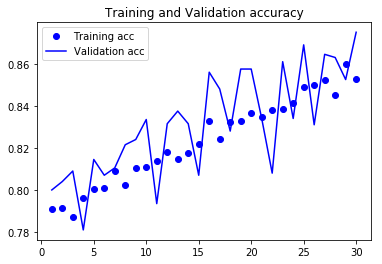

In [140]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

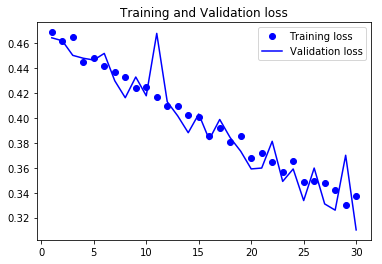

In [141]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Part6. < Use pre-trained network to compare with the model trained above >
    - only reuse the portion of CNN layers (b/c the rest is specificly trained to a different problem)
    - Reference from : Deep Learning with Python written by Francois Chollet

In [10]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

In [11]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [41]:
# Reference from : Deep Learning with Python written by Francois Chollet
import numpy as np

data_generator = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, num_sample):
    features = np.zeros(shape=(num_sample,4,4,512)) #b/c shape of final feature map is (None,4,4,512)
    labels = np.zeros(shape=(num_sample))
    generator = data_generator.flow_from_directory(directory,
                                                   target_size=(150,150),
                                                   batch_size=batch_size,
                                                   class_mode='binary')
    i = 0
    for input_batch, label_batch in generator:
        feature_batch = conv_base.predict(input_batch)
        features[i*batch_size : (i+1)*batch_size] = feature_batch
        labels[i*batch_size : (i+1)*batch_size] = label_batch
        i += 1
        if i*batch_size >= num_sample:
            break
    return features, labels

In [13]:
train_features, train_labels = extract_features(train_dir, 4000)

Found 4000 images belonging to 2 classes.


In [14]:
validation_dir = os.path.join(data_dir, 'validation')
validation_features, validation_labels = extract_features(validation_dir, 2000)

Found 2000 images belonging to 2 classes.


In [42]:
print(train_features.shape)
print(train_labels.shape)
print(validation_features.shape)
print(validation_labels.shape)

(4000, 4, 4, 512)
(4000,)
(2000, 4, 4, 512)
(2000,)


In [50]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

In [51]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [52]:
history = model.fit(
    train_features,
    train_labels,
    epochs=100,
    batch_size=20,
    validation_data=(validation_features,validation_labels))

Train on 4000 samples, validate on 2000 samples
Epoch 1/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.5497 - acc: 0.7195 - val_loss: 0.4185 - val_acc: 0.8425
Epoch 2/100
4000/4000 [==============================] - 4s 1ms/step - loss: 0.4019 - acc: 0.8320 - val_loss: 0.3485 - val_acc: 0.8580
Epoch 3/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.3426 - acc: 0.8635 - val_loss: 0.3160 - val_acc: 0.8775
Epoch 4/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.3076 - acc: 0.8705 - val_loss: 0.2889 - val_acc: 0.8895
Epoch 5/100
4000/4000 [==============================] - 4s 1ms/step - loss: 0.2856 - acc: 0.8902 - val_loss: 0.2727 - val_acc: 0.8845
Epoch 6/100
4000/4000 [==============================] - 4s 1ms/step - loss: 0.2676 - acc: 0.8967 - val_loss: 0.2567 - val_acc: 0.9030
Epoch 7/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.2506 - acc: 0.9065 - val_loss: 0.2477 - val_acc: 0.9020
Epoch 8

Epoch 61/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0912 - acc: 0.9700 - val_loss: 0.1801 - val_acc: 0.9330
Epoch 62/100
4000/4000 [==============================] - 4s 1ms/step - loss: 0.0894 - acc: 0.9735 - val_loss: 0.1902 - val_acc: 0.9255
Epoch 63/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0923 - acc: 0.9692 - val_loss: 0.1858 - val_acc: 0.9380
Epoch 64/100
4000/4000 [==============================] - 4s 1ms/step - loss: 0.0905 - acc: 0.9705 - val_loss: 0.1804 - val_acc: 0.9370
Epoch 65/100
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0838 - acc: 0.9740 - val_loss: 0.1841 - val_acc: 0.9375
Epoch 66/100
4000/4000 [==============================] - 4s 1ms/step - loss: 0.0862 - acc: 0.9722 - val_loss: 0.1809 - val_acc: 0.9340
Epoch 67/100
4000/4000 [==============================] - 4s 1ms/step - loss: 0.0849 - acc: 0.9720 - val_loss: 0.1811 - val_acc: 0.9345
Epoch 68/100
4000/4000 [========================

In [53]:
model.save('malaria_detector_VGG16')

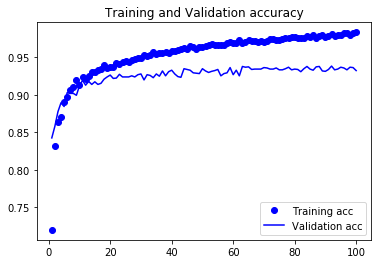

In [56]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

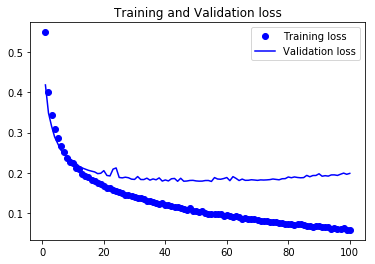

In [55]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Part7. < Conclusion >

Among all models, the highest test accuracy (0.9519999927282333) was attained by 'malaria_detector_data_augmented.h5' using 4k of images (out of 27,558) for training.

Room for improvements:
1. Use more data for training : utilizing GPU, train the model feeding more images
2. Since using small amount of data, can apply cross-validation to use more images for training. However, requires a lot of computations.
3. Fine tuning: train again a few convolutional neural networks (top ones) from the pre-trained model with our data.